In [1]:
import pathlib

import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns

import sidekick

##  Load the data
Provided is a synthetic dataset to show the steps often required to prepare a tabular dataset, note that not all steps will be necessary for your dataset.

In [2]:
dataset_path = pathlib.Path("./synthetic_insurance_ruined.csv")
df = pd.read_csv(dataset_path, index_col=0)
display(df.head())

,Age,Sex,Number of Dependents,Has Chronic Disease,Employment type,Industry,Annual Income (USD),Previously Bought insurance,Insurance Score,Insurance Level,Date,Insured
0,62,Male,2,1,Full-time,Retail,39450.0,0.0,39.0,Bronze,2021-10-09,True
1,72,Female,2,0,Unemployed,NaN,NaN,0.0,49.0,Silver,2021-10-09,True
2,49,Male,3,0,Full-time,IT,138191.0,0.0,62.0,Gold,2021-10-09,True
3,59,Male,2,1,Full-time,Manufacturing,71438.0,1.0,54.0,Silver,2021-10-09,True
4,55,Female,2,0,Full-time,Retail,34174.0,0.0,44.0,Silver,2021-10-09,True


Let's start off by getting some information about what our dataset looks like:

In [3]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 16310
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          50500 non-null  int64  
 1   Sex                          50500 non-null  object 
 2   Number of Dependents         50500 non-null  object 
 3   Has Chronic Disease          50500 non-null  int64  
 4   Employment type              50500 non-null  object 
 5   Industry                     46444 non-null  object 
 6   Annual Income (USD)          44114 non-null  float64
 7   Previously Bought insurance  45444 non-null  float64
 8   Insurance Score              50005 non-null  float64
 9   Insurance Level              50500 non-null  object 
 10  Date                         50500 non-null  object 
 11  Insured                      50500 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 4.7+ MB


None

,Age,Has Chronic Disease,Annual Income (USD),Previously Bought insurance,Insurance Score
count,50500.000000,50500.000000,44114.000000,45444.000000,50005.000000
mean,53.353901,0.495703,55249.650882,0.617265,49.124008
std,11.966905,0.499986,28618.534219,0.486060,13.487463
min,18.000000,0.000000,10249.000000,0.000000,0.000000
25%,45.000000,0.000000,35052.250000,0.000000,40.000000
50%,54.000000,0.000000,51646.500000,1.000000,49.000000
75%,63.000000,1.000000,66739.000000,1.000000,58.000000
max,77.000000,1.000000,198930.000000,1.000000,100.000000


# TODO some observations about dataset and introduction

# Data Leakage (row level)
## What is the problem?
A model has been trained on leaky data is likely to perform poorly while the model will likely appeaer to perform deceptively well on the validation/test set.

## How to deal with it
Simply applying the drop_duplicates method as below will remove any duplicate rows.

In [4]:
table = sidekick.drop_duplicates(df)

# Dataset  Split
Before proceeding with the following steps it is a good idea to define your datasets.
The reason for doing it at this point is that you would not want any imputed data in the validation/test sets.
Note: This is not an issue if you simply drop rows with missing values.
## How to split your data?
Applying the create_subsets function will creaete a new column: "Set", indicating which set the row belongs to. 
It will ensure that there is no missing data in the validation/test sets, note that this affeects the sizes of the sets.

In [5]:
table = sidekick.create_subsets(table, test_size = 0.2, valid_size = 0.25)

# TODO mention othere available splitting methods

Aside from ensuring that there is no imputed data in your test/validation set, it is good to be aware of the data distributions for the different sets.
To start off, we can check out the size of the sets.

<AxesSubplot:xlabel='Set', ylabel='count'>

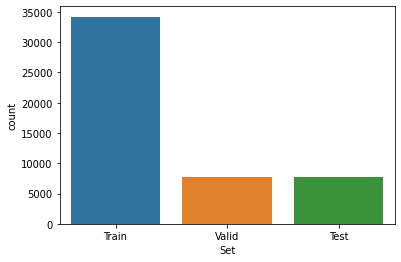

In [6]:
display(sns.countplot(x=table["Set"]))

We can also compare the distribution of the data for the different sets as such

In [7]:
labels = ["Bronze", "Silver", "Gold"]

Full data:

<AxesSubplot:xlabel='Insurance Level', ylabel='count'>

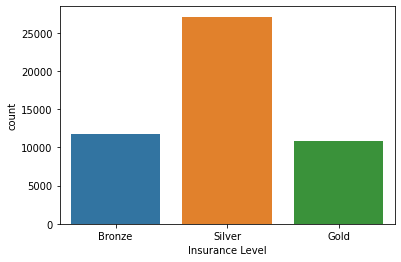

In [8]:
display(sns.countplot(x=table["Insurance Level"], order=labels))

Training set:

<AxesSubplot:xlabel='Insurance Level', ylabel='count'>

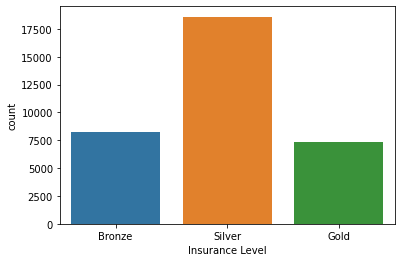

In [9]:
display(sns.countplot(x=table.loc[table["Set"]=="Train","Insurance Level"], order=labels))

Validation Set:

<AxesSubplot:xlabel='Insurance Level', ylabel='count'>

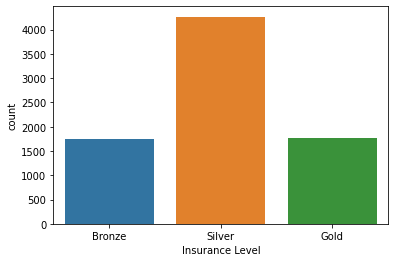

In [10]:
display(sns.countplot(x=table.loc[table["Set"]=="Valid","Insurance Level"], order=labels))

Test Set:

<AxesSubplot:xlabel='Insurance Level', ylabel='count'>

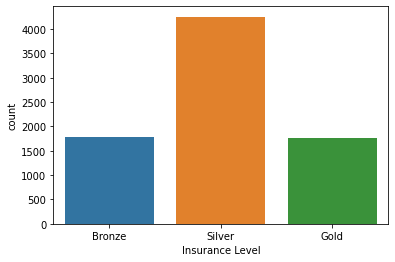

In [11]:
display(sns.countplot(x=table.loc[table["Set"]=="Test","Insurance Level"], order=labels))

If there is a major difference between the distribution of the data in the different sets particularily for your target column
It is worth it to considering using stratified sampling when creating the subsets, this is done using 
sidekick.create_subsets(table, stratify=table["col"]) where col is the name of the column to sample for.

For categorical columns countplot is useful but for numerical columns, histplot or distplot are preferable.
All columns can be visualized in this manner, you would simply change the "Insurance Level" to the column you wish to inspect.

<AxesSubplot:xlabel='Annual Income (USD)', ylabel='Count'>

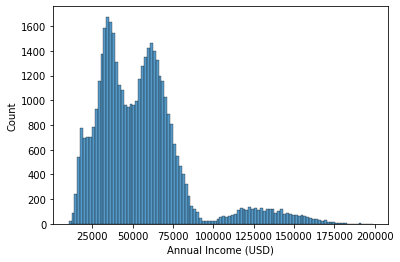

In [12]:
display(sns.histplot(x=table["Annual Income (USD)"]))

Note: If the columns contain missing values the visualization methods might not work, how to deal with this is covered below.

# Missing Values
## What is the problem?
It is impossible to train a model on data containing missing values.
## How to detect the problem?
Using the show_summary function, we can highligt if there are missing values and in which columns.

In [13]:
display(sidekick.show_summary(table))

,Not Missing,Total Missing,% Missing,Column Types
Annual Income (USD),37612,6073,13.901797,float64
Previously Bought insurance,39750,5004,11.181123,float64
Industry,42218,3770,8.197791,object
Insurance Score,48782,488,0.990461,float64
index,49758,0,0.000000,int64
Age,49758,0,0.000000,int64
Sex,49758,0,0.000000,object
Number of Dependents,49758,0,0.000000,object
Has Chronic Disease,49758,0,0.000000,int64
Employment type,49758,0,0.000000,object


## How to deal with it?

- The easiest and likely safest way to do it is to drop all rows with missing values. The con with this approach is that your dataset becomes vastly smaller, and as much data as possible for training is always a good thing!
- For continuos values (measurements, prices, age). A good praxis is to replace it with the "mean" of all values
- For categorical values (colors, dog breed, a persons sex, Insurance rating). Those values have predefined categories, and there, using the "mode" (most common category) is the most common
- When you want to set an explicit value, you can also provide that using "replace" with a specific "value"
- For a simple solution

- We also provide an "auto" imputation, which will try to guess the type of data you have and choose and apply an imputation method for you.
The columns to impute can be on multiple columns at once. You can also do it on all of the columns, but we then need to define which column should be your target. The reason is the target (what you want to learn a model to predict)

If you are unsure what type data your columns contain, you can find by inspecting the column `Column Type` by calling:
```python
sidekick.show_summary(table)
```

- For categories of type float64 and sometimes int64, the "mean" or "replace" imputation is the most likely.
- For string, object and sometimes int64 typed columns, the "mode" inputation is the most likely to use.

Note: You should not impute data for your target column, it is preferable to drop the rows where the target value is missing.

#### Mean imputation
For the first value, we see that the values are continous
Therefore, apply the "mean" imputation

In [14]:
display(table["Annual Income (USD)"].head())
table = sidekick.impute_values(table, columns="Annual Income (USD)", method="mean") # TODO warning message

0     39450.0
1    138191.0
2     71438.0
3     34174.0
4     23712.0
Name: Annual Income (USD), dtype: float64

We can see now that the values have been filled in

In [15]:
display(table["Annual Income (USD)"].head())

0     39450.0
1    138191.0
2     71438.0
3     34174.0
4     23712.0
Name: Annual Income (USD), dtype: float64

#### Mode imputation

In [16]:
display(sidekick.show_summary(table))
display(table["Industry"].head())
table = sidekick.impute_values(table, columns="Industry", method="mode")
display(table["Industry"].head())

,Not Missing,Total Missing,% Missing,Column Types
Previously Bought insurance,39750,5004,11.181123,float64
Industry,42218,3770,8.197791,object
Insurance Score,48782,488,0.990461,float64
index,49758,0,0.000000,int64
Age,49758,0,0.000000,int64
Sex,49758,0,0.000000,object
Number of Dependents,49758,0,0.000000,object
Has Chronic Disease,49758,0,0.000000,int64
Employment type,49758,0,0.000000,object
Annual Income (USD),49758,0,0.000000,float64


0           Retail
1               IT
2    Manufacturing
3           Retail
4           Retail
Name: Industry, dtype: object

0           Retail
1               IT
2    Manufacturing
3           Retail
4           Retail
Name: Industry, dtype: object

#### Replace with values imputation

In [17]:
display(table["Previously Bought insurance"])
table = sidekick.impute_values(
    table, columns="Previously Bought insurance", method="replace", value=0
)
display(table["Previously Bought insurance"].head())

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
49753    1.0
49754    1.0
49755    0.0
49756    0.0
49757    0.0
Name: Previously Bought insurance, Length: 49758, dtype: float64

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Previously Bought insurance, dtype: float64

#### Drop missing values

In [18]:
display(table["Insurance Score"].head())
table = sidekick.impute_values(table, columns="Insurance Score", method="drop")

0    39.0
1    62.0
2    54.0
3    44.0
4    18.0
Name: Insurance Score, dtype: float64

There also is a method for dropping missing values

In [19]:
table = sidekick.impute_values(table, columns=["Previously Bought insurance"])

Or even drop multiple columns

In [20]:
table = sidekick.impute_values(
    table, columns=["Previously Bought insurance", "Insurance Score"]
)

You can even drop all rows with missing values at once (two different, but valid ways)!

In [21]:
table = sidekick.impute_values(
    table, columns=table.columns, target="Insurance Level", method="drop"
)
table = sidekick.drop_missing_values(table)

#### TODO: Auto impute
We also have an automatic imputation, that will try to guess the imputation to be done per column.
This, or dropping rows, is usually the simplest and fastest solution
This method is set bu default, so passing `method='auto'` and leaving it out is equivalent

In [22]:
table = sidekick.impute_values(table, columns=table.columns, target="Insurance Level")
table = sidekick.impute_values(
    table, columns=table.columns, target="Insurance Level", method="auto"
)

#### After having imputed or removed the missing data, we make sure that we no longer have any

In [23]:
display(sidekick.show_summary(table))

,Not Missing,Total Missing,% Missing,Column Types
index,49270,0,0.0,float64
Age,49270,0,0.0,float64
Sex,49270,0,0.0,object
Number of Dependents,49270,0,0.0,object
Has Chronic Disease,49270,0,0.0,float64
Employment type,49270,0,0.0,object
Industry,49270,0,0.0,object
Annual Income (USD),49270,0,0.0,float64
Previously Bought insurance,49270,0,0.0,float64
Insurance Score,49270,0,0.0,float64


# TODO column types
# TODO replace value in column ("1" vs 1)

# Class imbalance
## What is the problem?
Having imbalanced classes can lead to deceptively good looking model performance, and undesirable model behaviour. 
For example in a binary classification scenarion, if your data consists of 90% class 1 and 10 % class 2, a model that learns to always predict class 1 will have a 90% accuracy.
## How do you detect the problem?
The simplest way is to plot your target column as we did above
Also, The percentages of specific classes can be calculated as such:

In [24]:
display(df['Insurance Level'].value_counts(normalize=True))

Silver    0.545109
Bronze    0.236356
Gold      0.218535
Name: Insurance Level, dtype: float64

In this dataset the data is clearly imbalanced, with the Silver class consisting of more data than the other two classes combined.

## How do you deal with the problem?
There are a few ways of tackling imbalanced classes: See the imbalanced data sections here: https://peltarion.com/knowledge-center/documentation/datasets-view/data-preprocessing/tabular-data-preprocessing
It is important to be aware that you have imbalanced classes, because this indicates that metrics such as accuracy are not good indicators of model performance.
Here are some suggestions for more suitable metrics to focus here: https://peltarion.com/knowledge-center/documentation/evaluation-view/measure-performance-when-working-with-imbalanced-data